# Classification of Images in the CIFAR-10 Dataset using CNNs

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load CIFAR-10 dataset
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
#Data shape 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Visualize Data

[1]


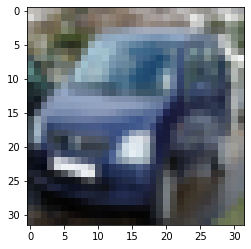

In [4]:
i = 45001 #random image
plt.imshow(X_train[i]) #print image
print(y_train[i]) #print image's label

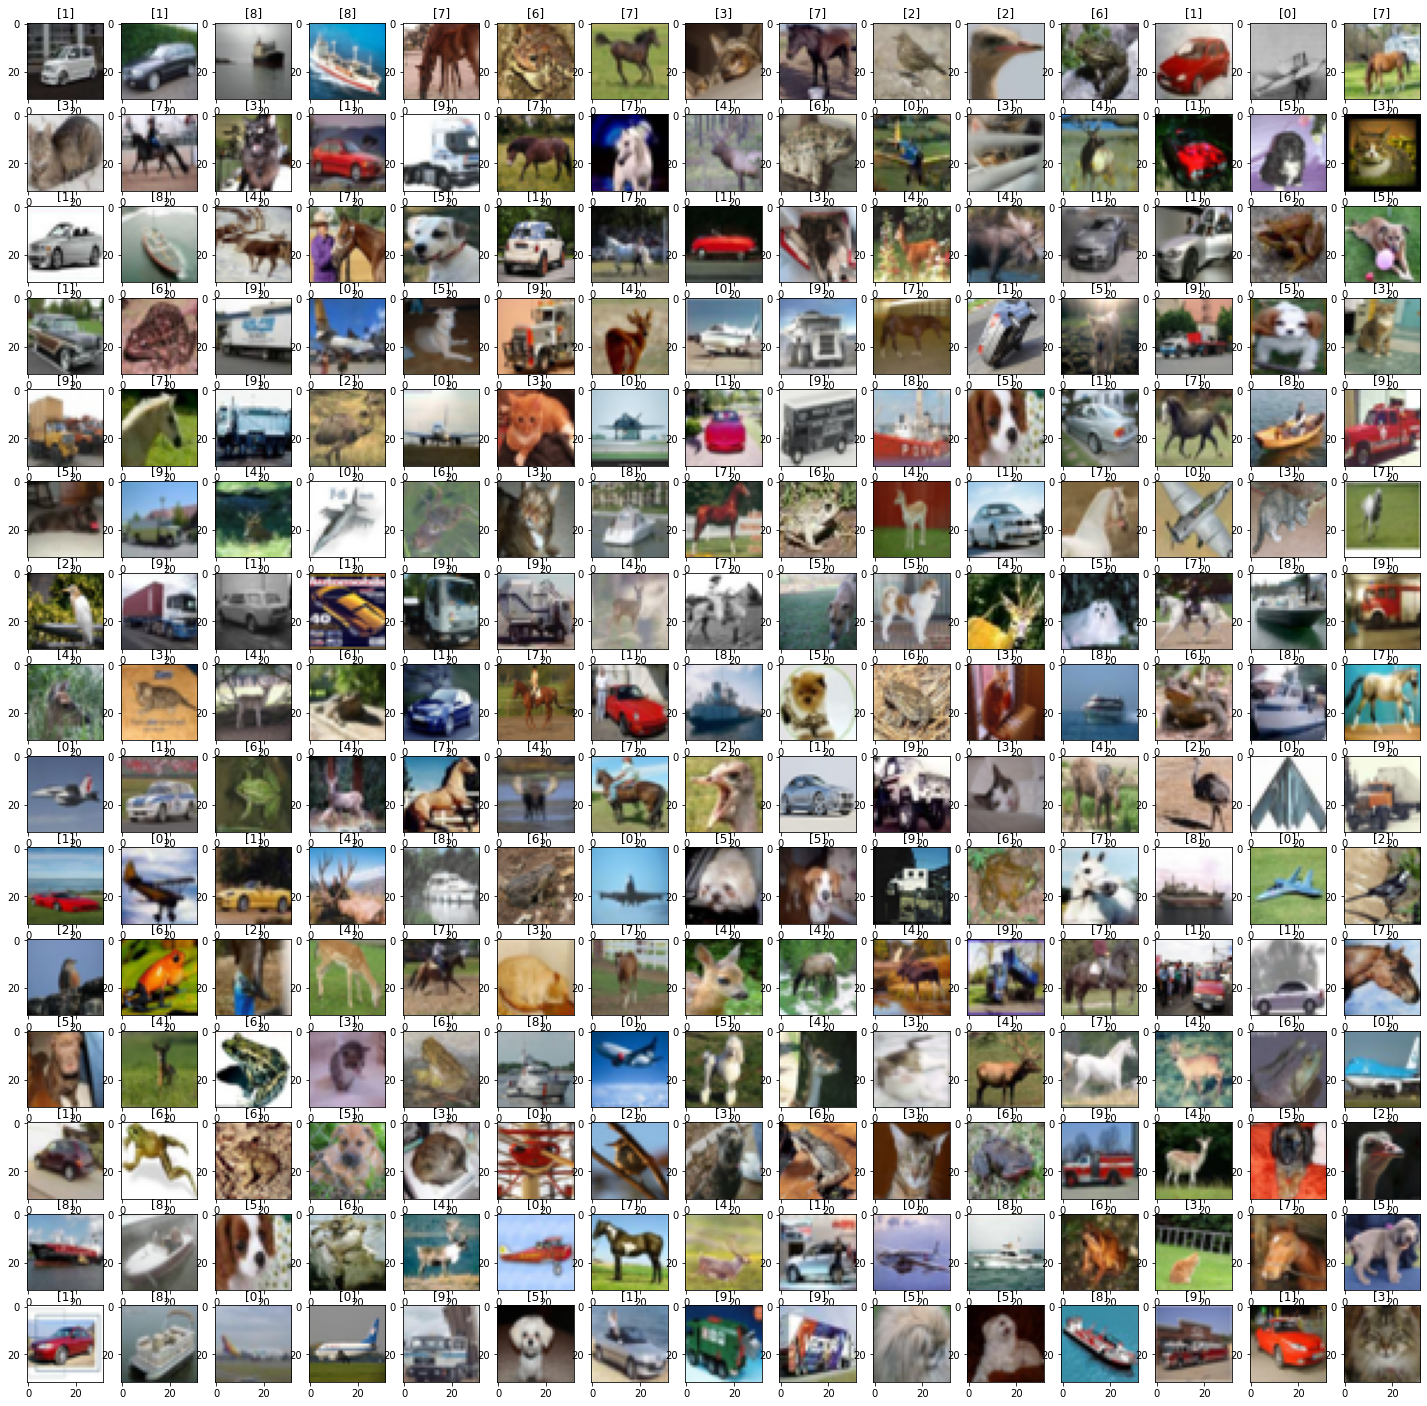

In [5]:
#visualize the data as a grid 
length = 15
width= 15
fig, axes = plt.subplots(length, width, figsize=(25,25)) #create a grid to display the images 
axes = axes.ravel()

n_training = len(X_train) #50000 

for i in np.arange(0, length*width):
    index = np.random.randint(0, n_training) #pick a random image to dispaly
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])

## Data Cleaning and Preparation

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [7]:
num_category = 10 #10 categories in the dataset
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
import keras 
y_train = keras.utils.to_categorical(y_train, num_category)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_test = keras.utils.to_categorical(y_test, num_category)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
#normalize the data 
X_train = X_train/255
X_test = X_test/255

In [13]:
inp_shape = X_train.shape[1:]
inp_shape

(32, 32, 3)

## Training the Model  

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [19]:
#build the model and add layers 
cnn_model = Sequential()
#first convolution 
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = inp_shape)) #convolutional layer 1
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu')) #convolutional layer 2
cnn_model.add(MaxPooling2D(pool_size=(2,2))) #perform maxpooling/ downsizing 
cnn_model.add(Dropout(0.4)) #add dropout for regularization 
#second convolution 
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) #convolutional layer 1
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2))) #perform maxpooling/ downsizing 
cnn_model.add(Dropout(0.2))
#flattening 
cnn_model.add(Flatten())
#create a fully connected network 
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(512, activation='relu'))
#output layer 
#outlayer will need 20 units as there a 10 categories in the dataset 
cnn_model.add(Dense(10, activation='softmax'))
